# Comparisons with PCA Modifications

There are factor models whose structure at the population level can be recovered with the treelet decomposition but cannot be recovered via PCA (see notebook 4) - i.e. population treelets do not coincie with population PCs. Can variations on PCA recover factor structures where regular PCA could not? This notebook looks at thee (four) variations on PCA:

## Introduction

#### PCA rotations

Rotations can simplify the expression of a particular subspace. In particular, rotating principle components Let $\boldsymbol{A}_m$ be a matrix of the first $m$ loadings from PCA and let $\boldsymbol{T}$ be an $m\times m$ rotation matrix, then the rotated loadings are given by $\boldsymbol{B_m = A_m T}$, where $\boldsymbol{T}$ is typically chosen to optimize some simplicity criteria. 

The **varimax rotation** chooses an orthogonal matrix to maximize the sum of variances of squared loadings; an implementation from the [stats](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/00Index.html) package is used. Since $\boldsymbol{T}$ is orthogonal all factors remain uncorrelated. The varimax rotation matrix is given by: 

$\boldsymbol{T_\text{varimax}} = \underset{\boldsymbol{T}}{\arg\min} \left \{ \sum_{k=1}^{m}\left ( \sum_{j=1}^{p} b_{j,k}^4 - \frac{1}{p}\left ( \sum_{j=1}^{p} b_{j,k}^2 \right )^2 \right ) \right \}$

The **quartimin** rotation choses an oblique $\boldsymbol{T}$ and so does not preserve orthogonality of loadings... An implementation from the [semTools](https://cran.r-project.org/web/packages/semTools/index.html) package is used.

#### Sparse PCA

PCA can e expressed as the solution to $p$ ridge regressions; adding an $l_1$ penalty leads to sparse loading vectors in the $l_0$ sense. Sparse PCA was proposed separately by[Zou, Hastie, and Tbshirani](https://web.stanford.edu/~hastie/Papers/spc_jcgs.pdf) as well as [Erichson et al.](https://arxiv.org/pdf/1804.00341.pdf),   an implementation of the latter is provided on [CRAN](https://cran.r-project.org/web/packages/sparsepca/index.html) and used here. 

#### Sparse and non-negative PCA

[Sigg and Buhmann](https://sigg-iten.ch/research/icml2008/sigg_buhmann-EM_for_sparse_nonnegative_PCA-2008-icml.pdf) propose sparse and non-negative PCA. Their method is implemented in the package [nsprcomp](https://cran.r-project.org/web/packages/nsprcomp/index.html). 

### Setup

*Note: data is generated in notebook 3 and read from the `data` folder*. 

In [12]:
library("semTools") # factor rotations
library("sparsepca") # sparse PCA
library("nsprcomp") # sparse and non-negative PCA

## Uncorrelated factors and non-overlapping loading vectors 

In [155]:
X = read.csv("../data/3_uncorrelated_factors.csv")

### PCA

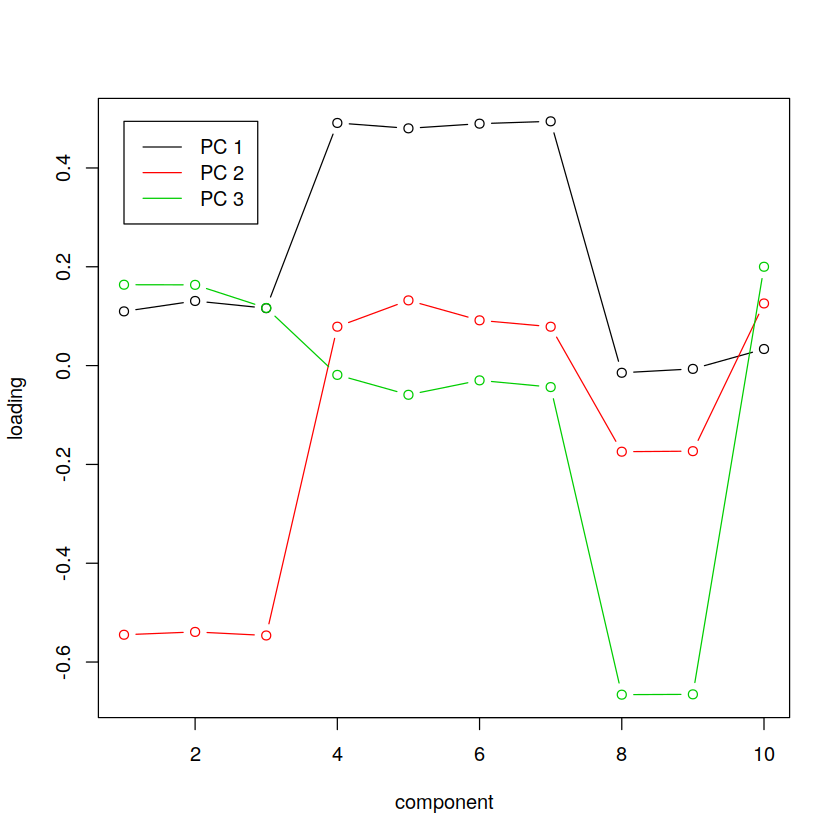

In [167]:
pca = prcomp(X)
loadings = pca$rotation[,1:3]
plot(loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(loadings),max(loadings)))
lines(loadings[,2], type = "b", col = 2)
lines(loadings[,3], type = "b", col = 3)
legend(1,max(loadings),legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

### PCA + Varimax

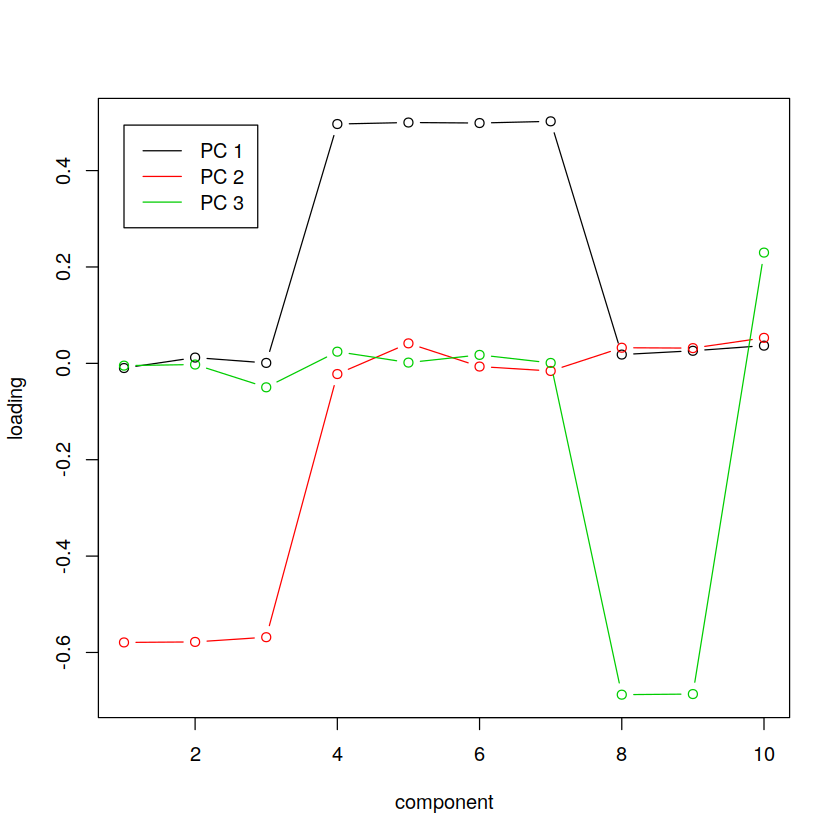

In [169]:
varimax_loadings = matrix(varimax(loadings)$loadings, dim(loadings)[1])
plot(varimax_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(varimax_loadings),max(varimax_loadings)))
lines(varimax_loadings[,2], type = "b", col = 2)
lines(varimax_loadings[,3], type = "b", col = 3)
legend(1,max(loadings),legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

### Sparse PCA

[1] "Iteration:    1, Objective: 1.49623e+03, Relative improvement Inf"


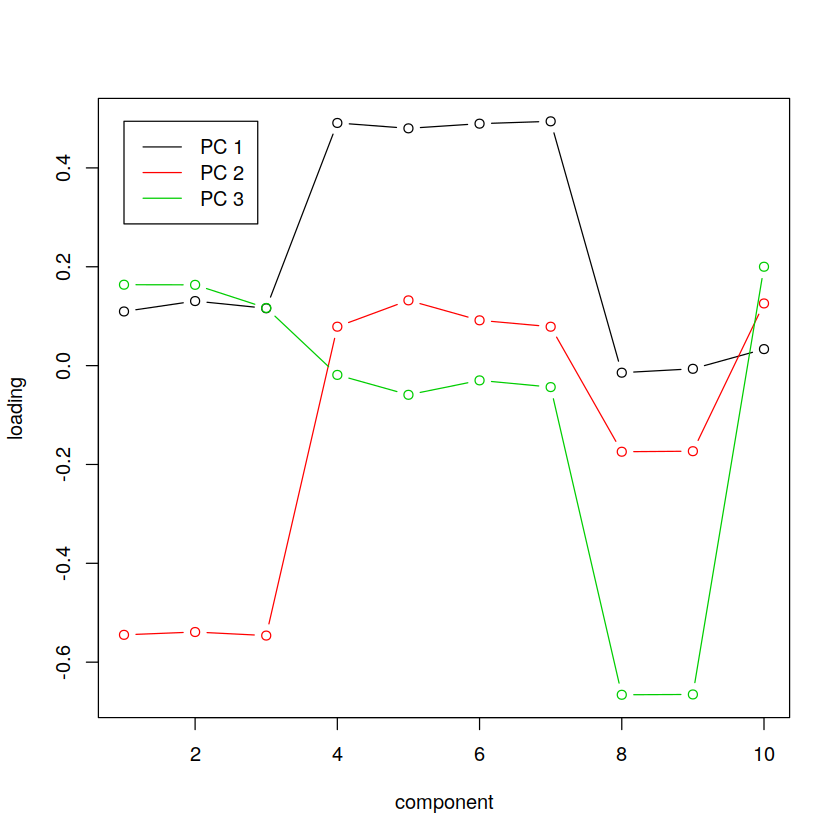

In [170]:
sparse_pca = spca(X, 3)
sparse_loadings = sparse_pca$loadings
plot(sparse_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(sparse_loadings),max(sparse_loadings)))
lines(loadings[,2], type = "b", col = 2)
lines(loadings[,3], type = "b", col = 3)
legend(1,max(loadings),legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

## Correlated factors and non-overlapping loading vectors 

In [171]:
X = read.csv("../data/3_correlated_factors.csv")

### PCA

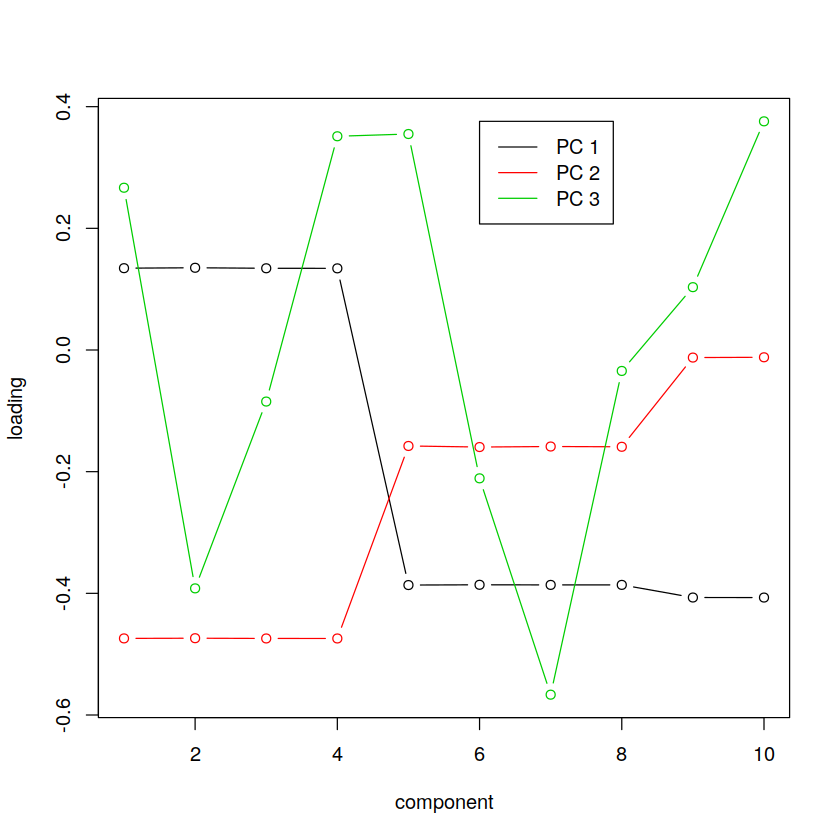

In [179]:
pca = prcomp(X)
loadings = pca$rotation[,1:3]
plot(loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(loadings),max(loadings)))
lines(loadings[,2], type = "b", col = 2)
lines(loadings[,3], type = "b", col = 3)
legend(6,max(loadings),legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

### PCA + varimax

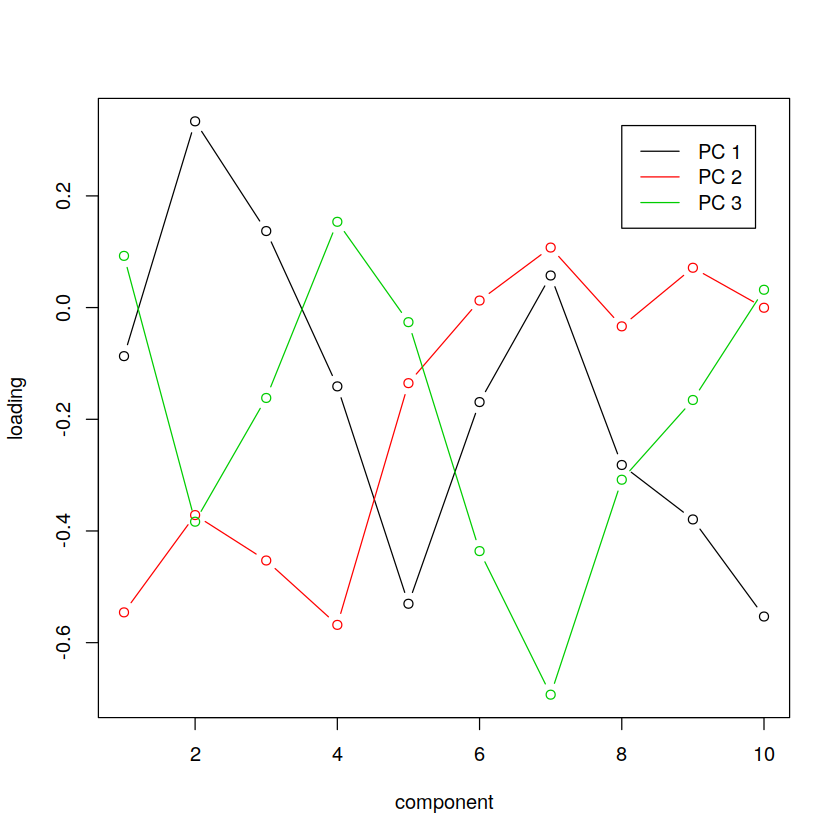

In [178]:
varimax_loadings = matrix(varimax(loadings)$loadings, dim(loadings)[1])
plot(varimax_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(varimax_loadings),max(varimax_loadings)))
lines(varimax_loadings[,2], type = "b", col = 2)
lines(varimax_loadings[,3], type = "b", col = 3)
legend(8,max(loadings)-.05,legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

### Sparse PCA

[1] "Iteration:    1, Objective: 1.76487e+01, Relative improvement Inf"
[1] "Iteration:   11, Objective: 1.76358e+01, Relative improvement 7.22875e-05"
[1] "Iteration:   21, Objective: 1.76231e+01, Relative improvement 7.16643e-05"
[1] "Iteration:   31, Objective: 1.76105e+01, Relative improvement 7.10527e-05"
[1] "Iteration:   41, Objective: 1.75981e+01, Relative improvement 7.04525e-05"
[1] "Iteration:   51, Objective: 1.75858e+01, Relative improvement 6.98635e-05"
[1] "Iteration:   61, Objective: 1.75735e+01, Relative improvement 6.92856e-05"
[1] "Iteration:   71, Objective: 1.75614e+01, Relative improvement 6.87186e-05"
[1] "Iteration:   81, Objective: 1.75494e+01, Relative improvement 6.81625e-05"
[1] "Iteration:   91, Objective: 1.75375e+01, Relative improvement 6.76171e-05"
[1] "Iteration:  101, Objective: 1.75257e+01, Relative improvement 6.70822e-05"
[1] "Iteration:  111, Objective: 1.75140e+01, Relative improvement 6.65577e-05"
[1] "Iteration:  121, Objective: 1.75024e+01, Re

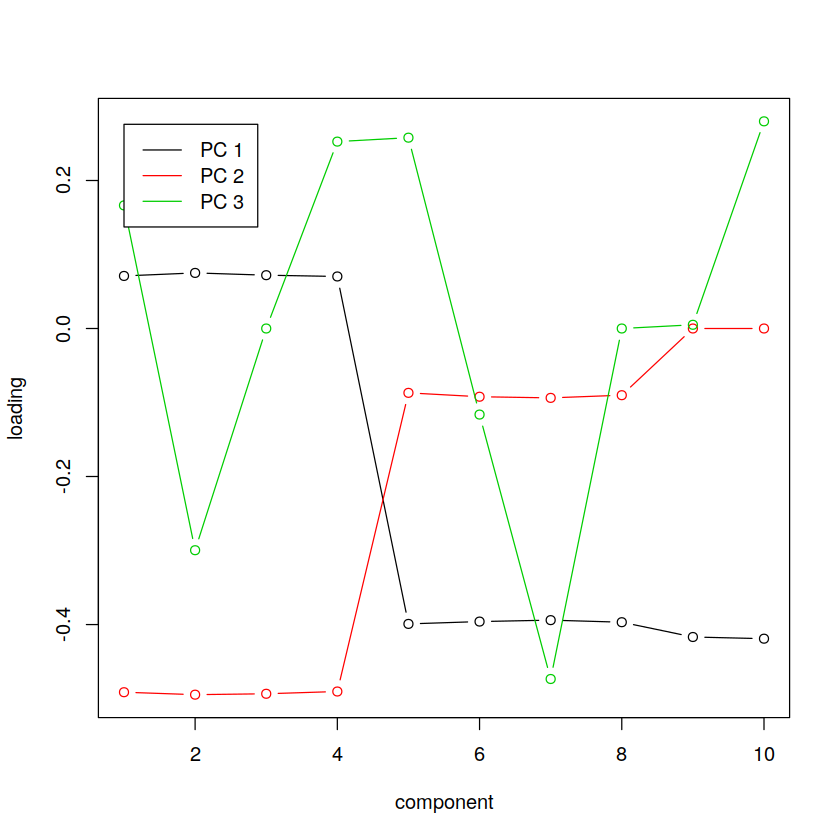

In [176]:
sparse_pca = spca(X, 3)
sparse_loadings = sparse_pca$loadings
plot(sparse_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(sparse_loadings),max(sparse_loadings)))
lines(sparse_loadings[,2], type = "b", col = 2)
lines(sparse_loadings[,3], type = "b", col = 3)
legend(1,max(loadings)-.1,legend=c("PC 1", "PC 2","PC 3"), lty = rep(1,3), col = 1:3)

## Uncorrelated factors and overlapping loading vectors $(p<n)$

In [137]:
X = read.csv("../data/3_overlapping_vectors_low_dim.csv")

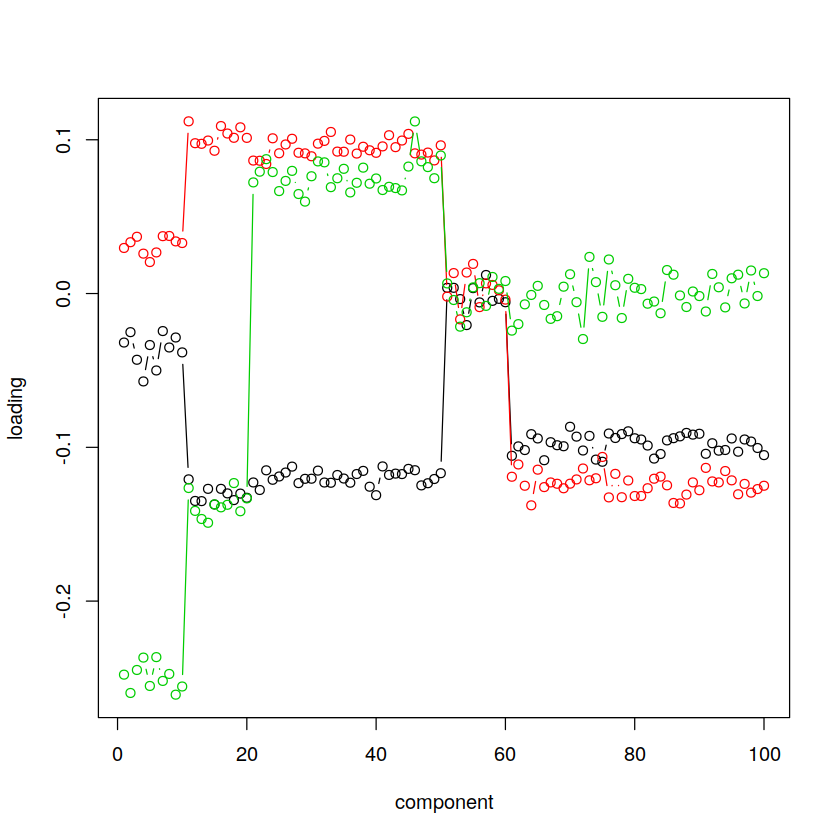

In [110]:
pca = prcomp(X)
loadings = pca$rotation[,1:3]
plot(loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(loadings),max(loadings)))
lines(loadings[,2], type = "b", col = 2)
lines(loadings[,3], type = "b", col = 3)

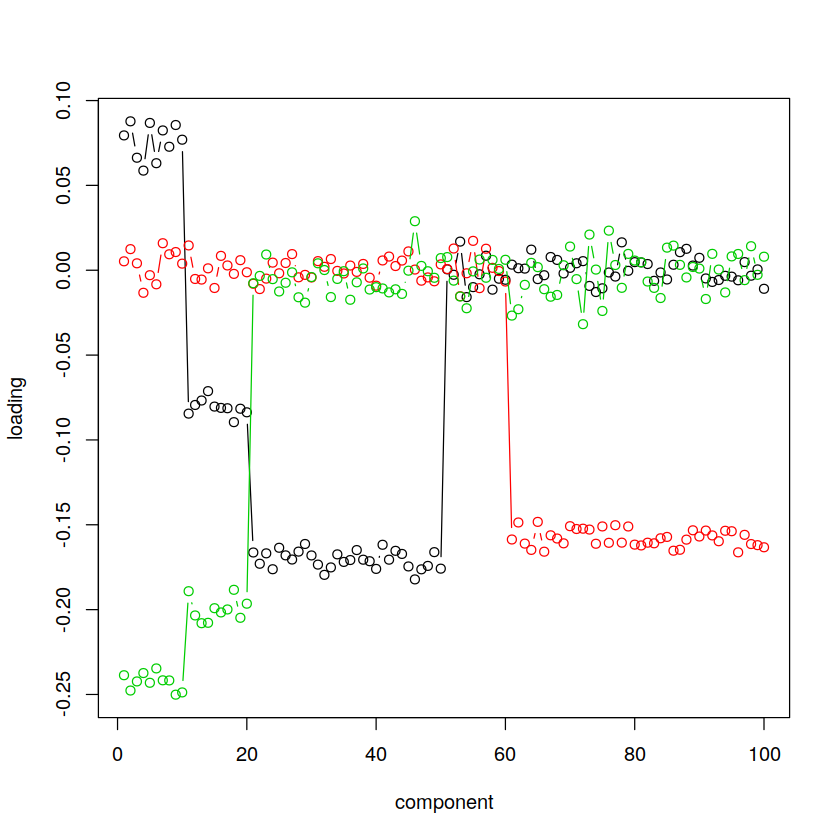

In [111]:
varimax_loadings = matrix(varimax(loadings)$loadings, dim(loadings)[1])
plot(varimax_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(varimax_loadings),max(varimax_loadings)))
lines(varimax_loadings[,2], type = "b", col = 2)
lines(varimax_loadings[,3], type = "b", col = 3)

[1] "Iteration:    1, Objective: 1.34562e+04, Relative improvement Inf"


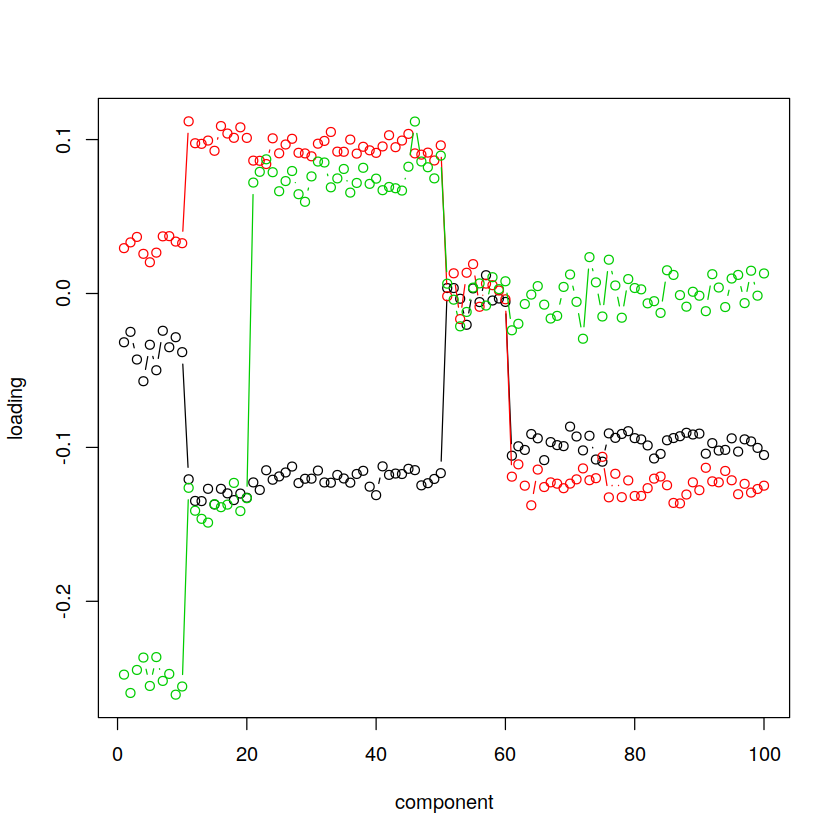

In [144]:
sparse_pca = spca(X, 3)
sparse_loadings = sparse_pca$loadings
plot(sparse_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(sparse_loadings),max(sparse_loadings)))
lines(sparse_loadings[,2], type = "b", col = 2)
lines(sparse_loadings[,3], type = "b", col = 3)

## Uncorrelated factors and overlapping loading vectors $(p\gg n)$

In [145]:
X = read.csv("../data/3_overlapping_vectors_high_dim.csv")

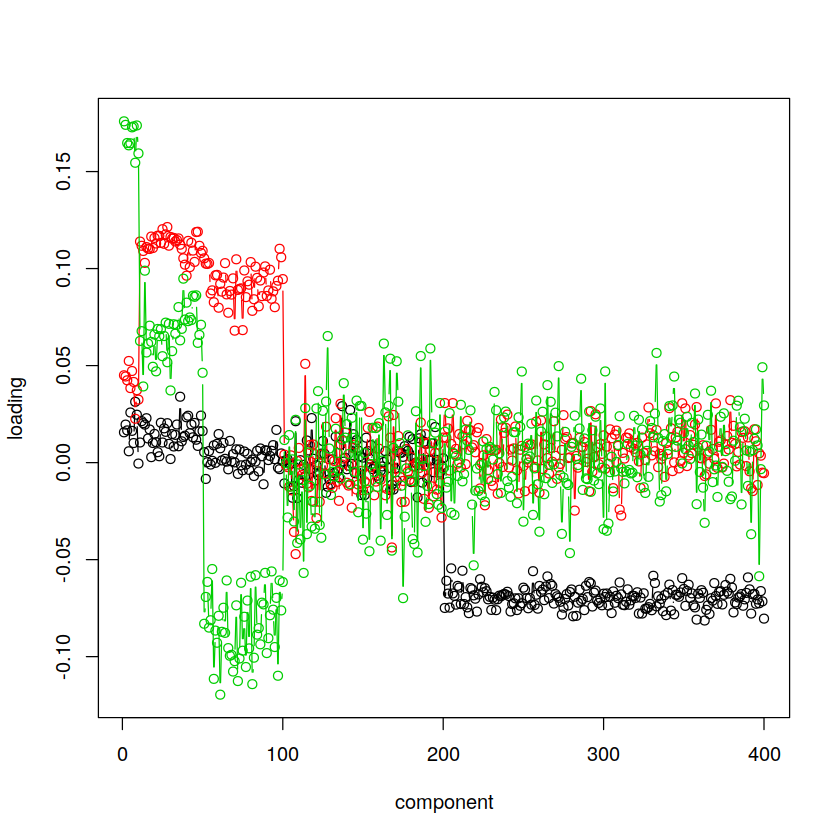

In [113]:
pca = prcomp(X)
loadings = pca$rotation[,1:3]
plot(loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(loadings),max(loadings)))
lines(loadings[,2], type = "b", col = 2)
lines(loadings[,3], type = "b", col = 3)

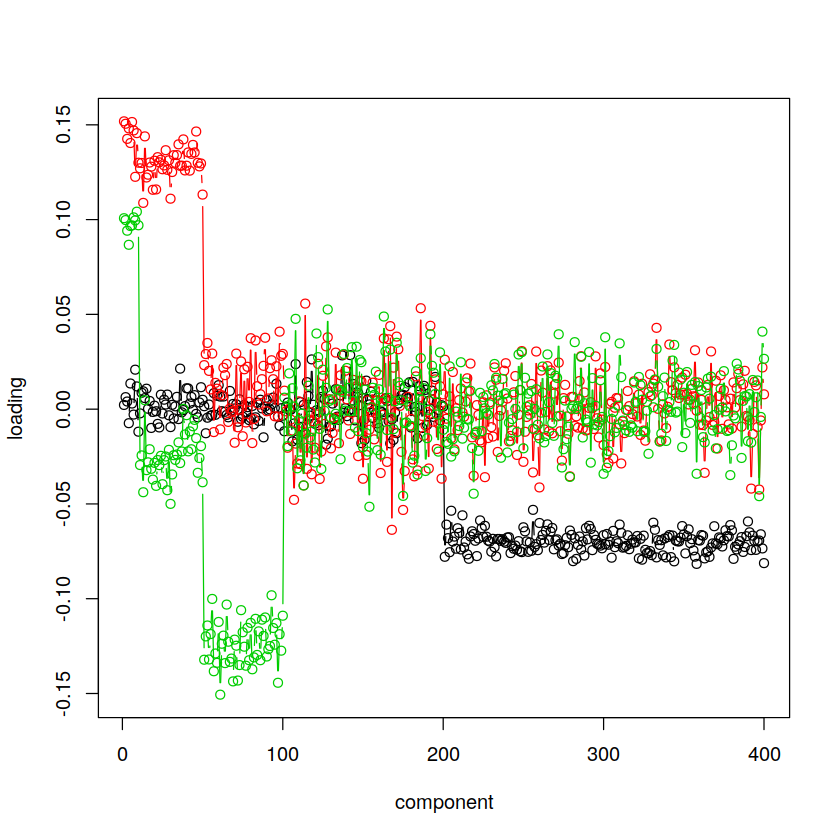

In [114]:
varimax_loadings = matrix(varimax(loadings)$loadings, dim(loadings)[1])
plot(varimax_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(varimax_loadings),max(varimax_loadings)))
lines(varimax_loadings[,2], type = "b", col = 2)
lines(varimax_loadings[,3], type = "b", col = 3)

[1] "Iteration:    1, Objective: 1.23183e+04, Relative improvement Inf"


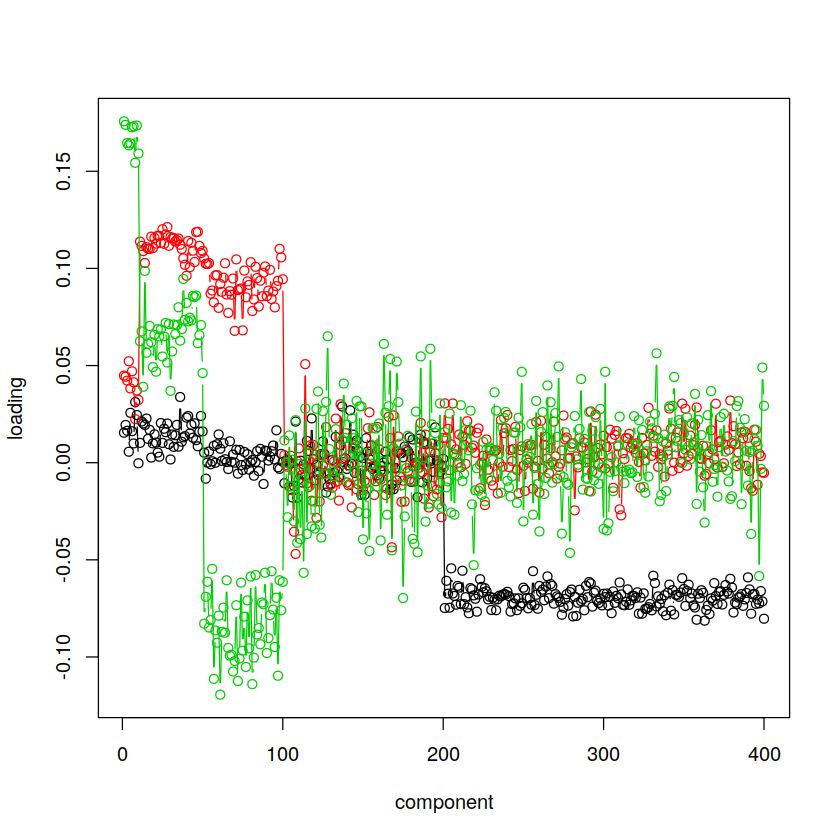

In [146]:
sparse_pca = spca(X, 3)
sparse_loadings = sparse_pca$loadings
plot(sparse_loadings[,1], type = "b", col = 1, 
     xlab = "component", 
     ylab = "loading", 
     ylim = c(min(sparse_loadings),max(sparse_loadings)))
lines(sparse_loadings[,2], type = "b", col = 2)
lines(sparse_loadings[,3], type = "b", col = 3)